### Importing package
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [125]:
### Pandas for DataFrame

data=pd.read_csv("C:\\Users\Jeevan\Desktop\Dataset\Advertising.csv",index_col=0)
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
print(data.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


## Exploratory Data Analysis

In [115]:
# Check the number of data points in the data set
print(len(data))
# Check the number of features in the data set
print(len(data.columns))
# Check the data types
print(data.dtypes.unique())
print(data.shape)
print(data.head())
print(data.describe())

200
5
[dtype('int64') dtype('float64')]
(200, 5)
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


#   Correlations between features and target

In [ ]:
x_train=data.drop('sales', axis=1)
y_train=data['sales']
x_valid=data.drop('sales', axis=1)
y_valid=data['sales']

 Questions About the Advertising Data¶
Let's pretend you work for the company that manufactures and markets this widget
The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:

1.Is there a relationship between ads and sales?
2.How strong is that relationship?
3.Which ad types contribute to sales?
4.What is the effect of each ad type of sales?
5.Given ad spending in a particular market, can sales be predicted?

        We will explore these questions below.

 Simple Linear Regression
Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable")
It takes the following form:
y=β0+β1x 
What does each term represent?

y  is the response
x  is the feature
β0  is the intercept
β1  is the coefficient for x

β0  and  β1  are called the model coefficients

To create your model, you must "learn" the values of these coefficients. Once we've learned these coefficients, we can use the model to predict Sales.

#  Estimating ("Learning") Model Coefficients

In [121]:
model=LinearRegression()
lm2=model.fit(x_train,y_train)
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms
print(lm2.intercept_)
print(lm2.coef_)
lm2.score(x_train, y_valid)
feature_mat=['unamed','TV','Radio','Newspaper']
list(zip(feature_mat,lm2.coef_))

3.005209420097856
[-0.00057983  0.04577592  0.18838318 -0.00124333]


[('unamed', -0.0005798278087352353),
 ('TV', 0.04577591959744509),
 ('Radio', 0.18838317597693335),
 ('Newspaper', -0.0012433261980317892)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


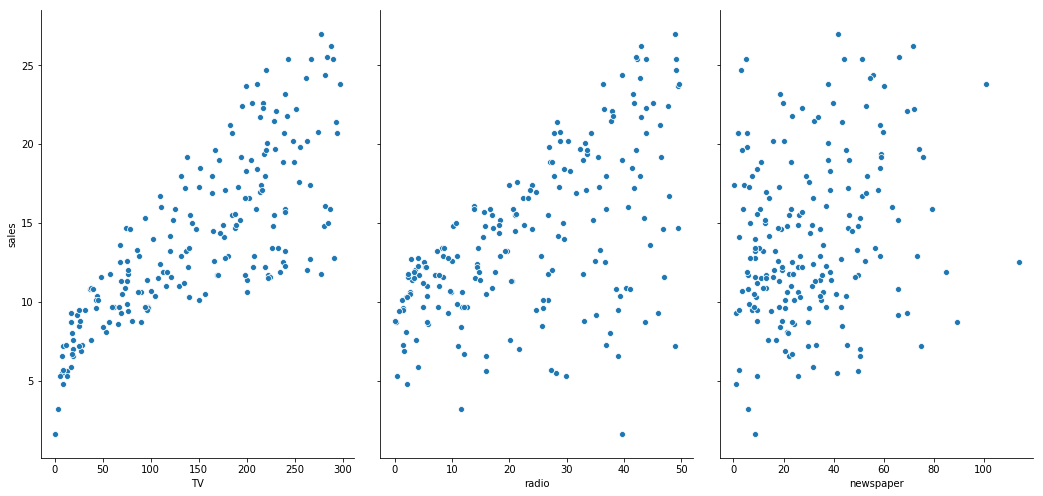

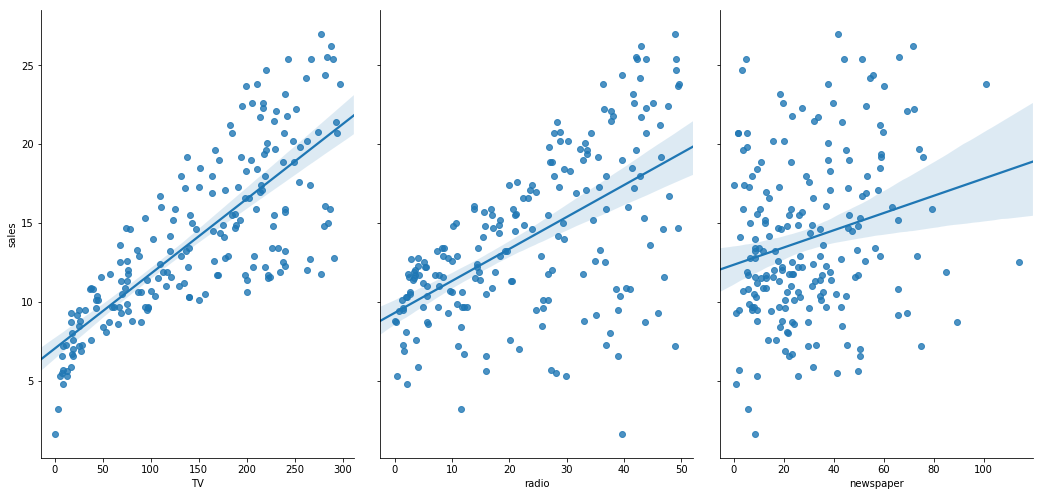

In [120]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [124]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()
lm3 = smf.ols(formula='sales ~ newspaper', data=data).fit()

# print the coefficients
lm1.params
lm3.params


# print the p-values for the model coefficients
lm1.pvalues
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        02:48:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

TV and Radio have small p-values, whereas Newspaper have a large p-value
Reject the null hypothesis for TV and Radio
There is association between features and Sales
Fail to reject the null hypothesis for Newspaper
There is no association
TV and Radio ad spending are both positively associated with Sales
Newspaper ad spending is slightly negatively associated with Sales
However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper
This model has a higher R-squared (0.897) than the previous model
This model provides a better fit to the data than a model that only includes TV

 Model Evaluation Metrics for Regression¶
For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i|
 
Mean Squared Error (MSE) is the mean of the squared errors:

1n∑i=1n(yi−y^i)2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1n∑i=1n(yi−y^i)2−−−−−−−−−−−−√
 
